<a href="https://colab.research.google.com/github/CarlosMejia07/Proyecto-Kaggle-UdeA-20252/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importe, descompresión e inspección de los datos**

In [ ]:
# Importe de los datos usando el archivo obtenido en kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 996MB/s]


In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


**Importe de las librerias a usar y lectura del archivo test**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


**Visualización de los datos (reconocimiento de los parámetros)**

In [9]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


**Agrupamiento de parámetros para comparar**

In [10]:
z = z[['F_EDUCACIONPADRE', 'F_EDUCACIONMADRE', 'E_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
z.head()

,F_EDUCACIONPADRE,F_EDUCACIONMADRE,E_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,Técnica o tecnológica incompleta,Postgrado,Entre 5.5 millones y menos de 7 millones,medio-alto
1,Técnica o tecnológica completa,Técnica o tecnológica incompleta,Entre 2.5 millones y menos de 4 millones,bajo
2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,bajo
3,No sabe,Secundaria (Bachillerato) completa,Entre 4 millones y menos de 5.5 millones,alto
4,Primaria completa,Primaria completa,Entre 2.5 millones y menos de 4 millones,medio-bajo


**Estudiantes por programa académico y por departamento, ordenados por orden alfabético**

In [ ]:
z1 = pd.read_csv("train.csv") #relectura del archivo, por la modificación previa de z

# filtrao de estudiantes por programa académico
EsxProg = z1["E_PRGM_ACADEMICO"].value_counts().sort_index()
print(EsxProg)

E_PRGM_ACADEMICO
3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES       69
ACTIVIDAD FISICA Y DEPORTE                          162
ACUICULTURA                                          79
ADMINISTRACION                                      117
ADMINISTRACION  FINANCIERA                           74
                                                  ...  
TRABAJO SOCIAL                                    12686
TRADUCCION INGLES-FRANCES-ESPAÑOL                    68
TURISMO                                             222
URBANISMO                                             7
ZOOTECNIA                                          1669
Name: count, Length: 948, dtype: int64


In [11]:
# filtrao de estudiantes por programa académico
EsxDep = z1["E_PRGM_DEPARTAMENTO"].value_counts().sort_index()
print(EsxDep)

E_PRGM_DEPARTAMENTO
AMAZONAS               40
ANTIOQUIA           83607
ARAUCA                589
ATLANTICO           41020
BOGOTÁ             282159
BOLIVAR             20629
BOYACA              14048
CALDAS              11640
CAQUETA              2659
CASANARE             1852
CAUCA               11471
CESAR                8279
CHOCO                4289
CORDOBA             12188
CUNDINAMARCA        14018
GUAVIARE               37
HUILA                9995
LA GUAJIRA           4778
MAGDALENA            9512
META                 7910
NARIÑO              13454
NORTE SANTANDER     22588
PUTUMAYO              795
QUINDIO              8229
RISARALDA           12679
SAN ANDRES             10
SANTANDER           28828
SUCRE                8674
TOLIMA              11921
VALLE               44588
VAUPES                 14
Name: count, dtype: int64


**Porcentaje de estudiantes por rendimiento global en las pruebas**

Porcentaje de estudiantes por rendimiento global:
RENDIMIENTO_GLOBAL
alto          25.360144
bajo          24.980072
medio-bajo    24.877256
medio-alto    24.782527
Name: proportion, dtype: float64


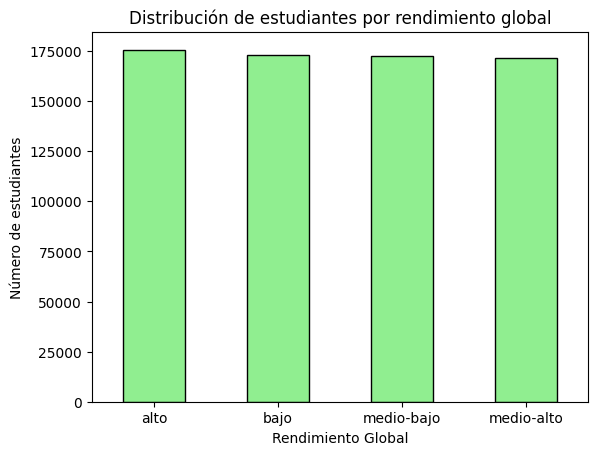

In [ ]:
# Cálculo de los porcentajes
porcentajes2 = z1["RENDIMIENTO_GLOBAL"].value_counts(normalize=True) * 100
print("Porcentaje de estudiantes por rendimiento global:")
print(porcentajes2)

# Generación del gráfico
z1["RENDIMIENTO_GLOBAL"].value_counts().plot(
    kind="bar", color="lightgreen", edgecolor="black"
)

# Los plt para dar forma a los gráficos
plt.title("Distribución de estudiantes por rendimiento global")
plt.xlabel("Rendimiento Global")
plt.ylabel("Número de estudiantes")
plt.xticks(rotation=0)
plt.show()

**Porcentaje de estudiantes por valor de matricula y por horas laboradas que obtuvieron 'x' rendimiento global**

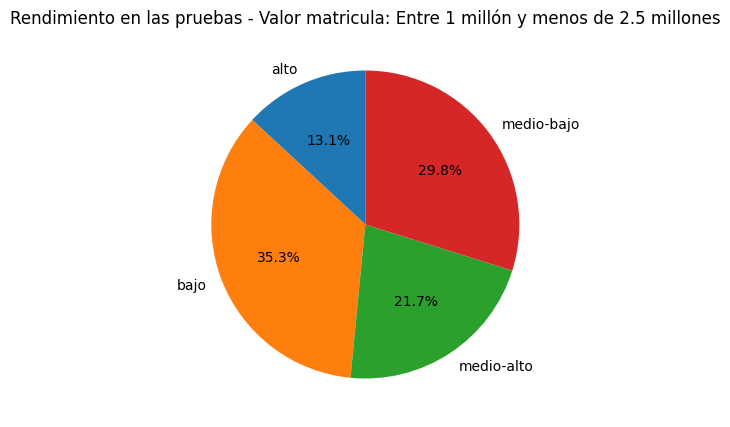

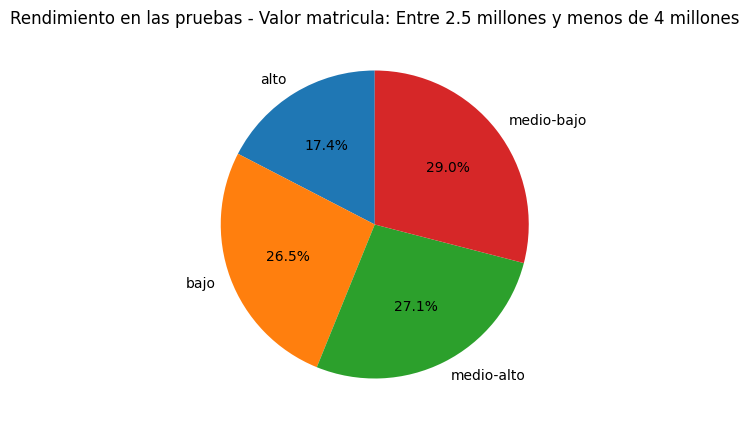

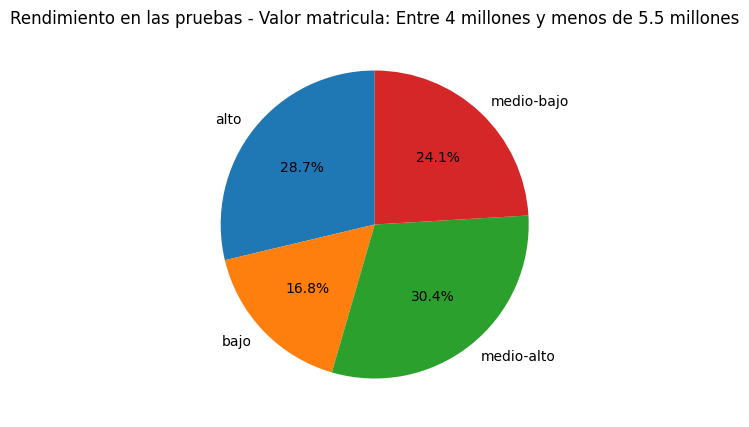

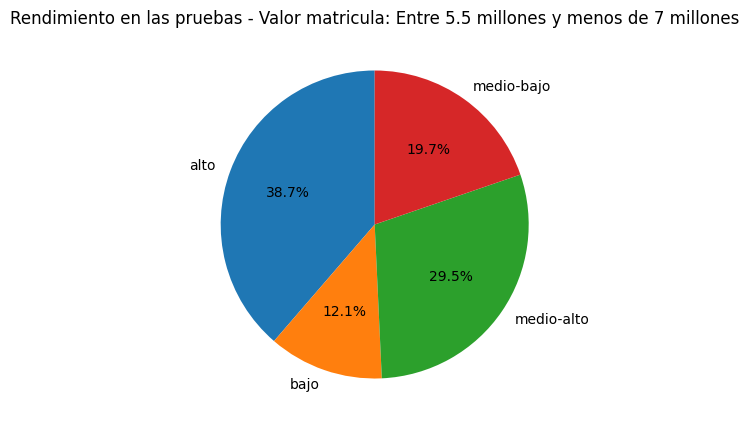

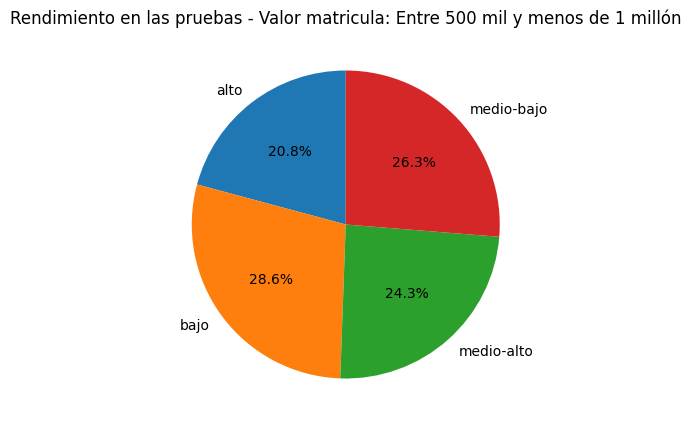

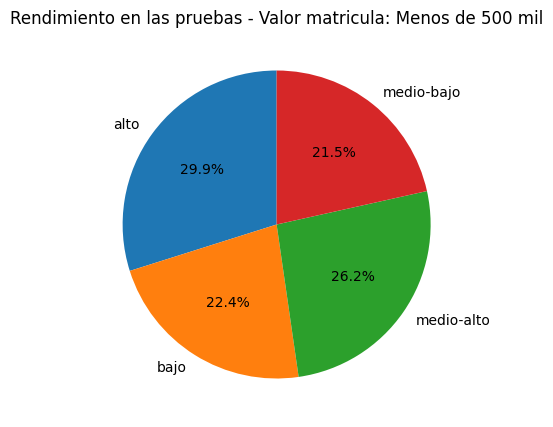

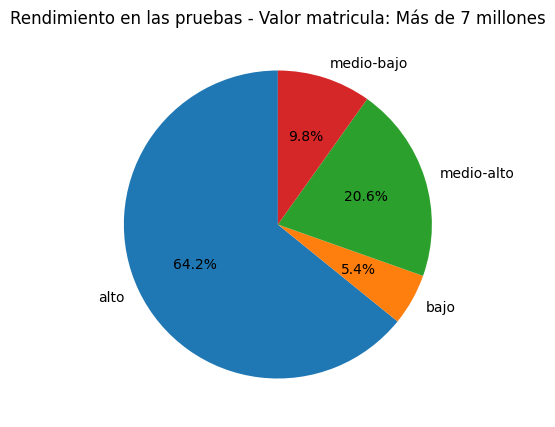

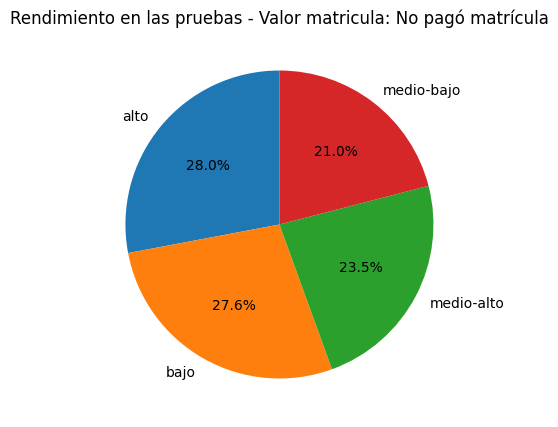

In [12]:
# Por valor de matricula
# Creación de una tabla para comparar las variables
tabla = pd.crosstab(
    z1["E_VALORMATRICULAUNIVERSIDAD"],
    z1["RENDIMIENTO_GLOBAL"],
    normalize="index"
) * 100

# pastel por cada valor de matrícula, se utiliza el for y el iterrows para
# recorrer la tabla.
for valor, fila in tabla.iterrows():
    plt.figure(figsize=(5,5))
    plt.pie(
        fila,
        labels=fila.index,
        autopct="%1.1f%%",
        startangle=90
    )
    plt.title(f"Rendimiento en las pruebas - Valor matricula: {valor}")
    plt.show()

In [13]:
# Por horas laboradas
# Acá se utiliza groupby, para agrupar (comparar) las variables
# también se pudo volver a usar crosstab
Estudio1 = (
    z1.groupby("E_HORASSEMANATRABAJA")["RENDIMIENTO_GLOBAL"]
      .value_counts(normalize=True) * 100
)

Estudio1

E_HORASSEMANATRABAJA  RENDIMIENTO_GLOBAL
0                     alto                  39.256971
                      medio-alto            24.796225
                      medio-bajo            19.679966
                      bajo                  16.266838
Entre 11 y 20 horas   bajo                  27.636656
                      medio-bajo            24.930734
                      alto                  23.782767
                      medio-alto            23.649844
Entre 21 y 30 horas   bajo                  26.412998
                      medio-bajo            26.232833
                      medio-alto            24.778570
                      alto                  22.575599
Menos de 10 horas     bajo                  29.170442
                      alto                  26.789462
                      medio-bajo            22.527554
                      medio-alto            21.512541
Más de 30 horas       medio-bajo            27.879865
                      medio-alto            26.509513
                      bajo                  25.162020
                      alto                  20.448603
Name: proportion, dtype: float64

**Rendimiento de los estudiantes que no tienen ni computador, ni internet**

Rendimiento global de estudiantes sin PC y sin Internet:
RENDIMIENTO_GLOBAL
bajo          45.514779
medio-bajo    28.149625
medio-alto    17.789714
alto           8.545881
Name: proportion, dtype: float64


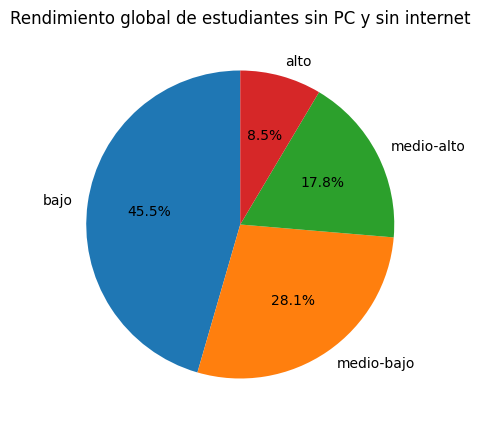

In [14]:
# filtrao de estudiantes cuyo valor en estas variables es No
SinPC_Int = (z1["F_TIENECOMPUTADOR"] == "No") & (z1["F_TIENEINTERNET"] == "No")
z1_filtrado = z1[SinPC_Int]

# cálculo de los porcentajes
porcentajes = z1_filtrado["RENDIMIENTO_GLOBAL"].value_counts(normalize=True) * 100

print("Rendimiento global de estudiantes sin PC y sin Internet:")
print(porcentajes)

# Generación del gráfico
porcentajes.plot(kind="pie", autopct="%1.1f%%", startangle=90, figsize=(5,5))
plt.ylabel("")
plt.title("Rendimiento global de estudiantes sin PC y sin internet")
plt.show()

**Rendimiento de los estudiantes que tienen computador e internet**

Rendimiento global de estudiantes con PC e Internet:
RENDIMIENTO_GLOBAL
alto          28.045991
medio-alto    25.555250
medio-bajo    24.296222
bajo          22.102537
Name: proportion, dtype: float64


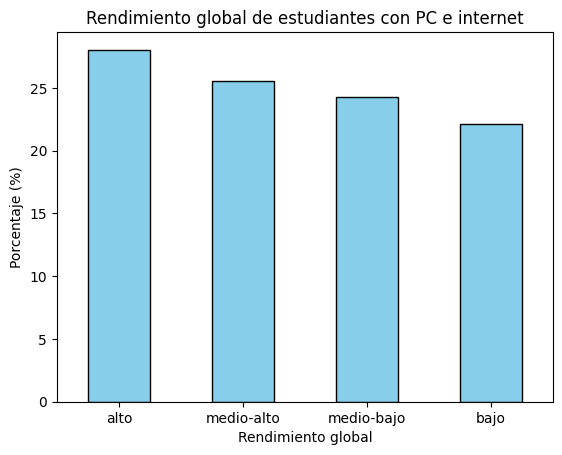

In [15]:
# filtrao de estudiantes cuyo valor en estas variables es Si
ConPC_Int = (z1["F_TIENECOMPUTADOR"] == "Si") & (z1["F_TIENEINTERNET"] == "Si")
z1_filtrado1 = z1[ConPC_Int]

# cálculo de los porcentajes
porcentajes1 = z1_filtrado1["RENDIMIENTO_GLOBAL"].value_counts(normalize=True) * 100

print("Rendimiento global de estudiantes con PC e Internet:")
print(porcentajes1)

# Generación del gráfico
porcentajes1.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Rendimiento global de estudiantes con PC e internet")
plt.xlabel("Rendimiento global")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)  # mantener etiquetas horizontales
plt.show()